<a href="https://colab.research.google.com/github/YashSarda10/Mini-Project-Digit-Recognizer/blob/master/DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [18]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)
5


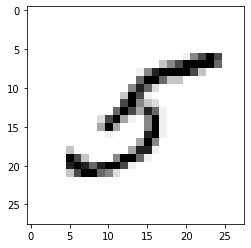

uint8


In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train[35])
plt.imshow(x_train[35], cmap='Greys')
plt.show()
print(x_train[35].dtype)

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation ='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [22]:
history = model.fit(x_train,y_train,epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6059 - accuracy: 0.9043
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3390 - accuracy: 0.9348
Epoch 3/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2838 - accuracy: 0.9411
Epoch 4/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2701 - accuracy: 0.9453
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2400 - accuracy: 0.9482
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2272 - accuracy: 0.9525


In [23]:
y_pred = model.predict(x_test)
predictions = [ np.argmax(x) for x in y_pred]
print(predictions)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 9, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 4, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 7, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 8, 4, 2, 0, 7, 1, 1, 2, 1, 

In [8]:
test = model.predict(np.reshape(x_test[0],(1,28,28)))
test

array([[0.0000000e+00, 9.1804999e-33, 3.4447202e-16, 2.2542205e-17,
        1.8296903e-27, 4.1420803e-26, 0.0000000e+00, 1.0000000e+00,
        6.9540623e-25, 3.1876118e-21]], dtype=float32)

In [9]:
np.argmax(model.predict(x_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9448

In [11]:
confusion_matrix(y_pred,y_test)

array([[ 918,    0,    4,    2,    0,    2,    5,    1,    0,    2],
       [   0, 1113,    0,    0,    2,    2,    3,    9,    0,    1],
       [   1,    5,  990,   12,    0,    2,    2,   14,    9,    0],
       [   1,    0,    4,  931,    0,   20,    0,    9,    3,    3],
       [   0,    2,    1,    0,  892,    0,    1,    1,    4,   10],
       [   3,    0,    1,   22,    1,  823,    4,    1,    5,    3],
       [   9,    4,    3,    0,   17,   13,  935,    1,    9,    2],
       [   1,    0,    6,    5,    9,    1,    0,  950,    2,    1],
       [  46,   11,   22,   25,   11,   21,    8,   12,  935,   26],
       [   1,    0,    1,   13,   50,    8,    0,   30,    7,  961]])

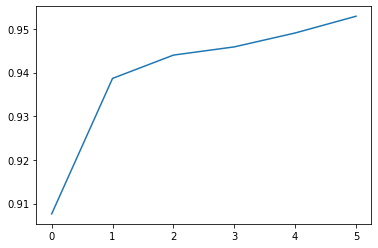

In [12]:
plt.plot(history.history['accuracy'])

In [13]:
model.save('model_digit.h5')